In [228]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt

In [227]:
commune=pd.read_excel('commune.xlsx')
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [112]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")

In [113]:
study_domain1.head()

,quest_id,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,0,0,0,0
2,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,0,0,0,0,1,0,0,0
3,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
4,905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1


In [114]:
s_d2=study_domain1.groupby("quest_id").sum()
s_d2.head()

,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
quest_id,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,1,0,0,0
905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1
905ec1ec-ce95-11eb-8136-7c67a234f601,0,1,0,0,0,0,0,0,0


In [115]:
tech = pd.get_dummies(data=technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
tech.head()

,key,quest_id,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
0,item1,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1,0,0,0
1,item11,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,0,0,0,0
2,item2,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,0,0,0,1,0,0,0,0
3,item3,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,1,0,0,0,0,0,0,0,0
4,item4,905e2608-ce95-11eb-809f-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
technology=technology.groupby("quest_id").sum()
technology.head()

,Unnamed: 0
quest_id,
905ddcf2-ce95-11eb-9a92-7c67a234f601,1
905e2608-ce95-11eb-809f-7c67a234f601,35
905e4cf5-ce95-11eb-96a9-7c67a234f601,55
905e73fd-ce95-11eb-a7b0-7c67a234f601,29
905e9b27-ce95-11eb-9c37-7c67a234f601,90


In [117]:
industry1=pd.get_dummies(data=industry[["quest_id","key","values"]], columns= ["values"], prefix="", prefix_sep="")
industry2= industry1.groupby("quest_id").sum()


In [176]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

first_merge=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
first_merge

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,HT0412,North-East,HT04


In [179]:
merge_out=pd.merge(left=first_merge, right=enroll, how = 'left',on='quest_id')
merge_out

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,Payment Method,user_id
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,39726355.0
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,Moncash,40117659.0
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,Moncash,40734954.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,NaN,NaN
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06,Credit Card/Paypal,41587952.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,HT0412,North-East,HT04,Moncash,41177453.0


In [120]:
a=30 #the selected number by the cohort
b=3 #the number oh the cohort
c=a*b #Total selected applicants
print("Total quantity of future applicants selected :" , c )

Total quantity of future applicants selected : 90


In [209]:
d=25/100 # the total represent the percent of women that will be selected for each average
d=0.25 #future selected women average
e=c*d # the result 
z=int(e+1)
z

23

In [210]:
#If we have the same application rate of women

l=47 #number of women applicants
m=4 #Actual selected women
e=c*d # the number of women that will be selected 
n=(l*e)/m # women's application number required in future 
z1=int(n+1)
z1

265

In [211]:
i=250 #actual number of applicants
l=47 # Actuel number of women applicants
n=265 
o=(i*n)/l # Number of future applications needed if we want to select 25% women for each on average , with 3 cohorts of 30 selected students
z2=int(o+1)
z2

1410

In [229]:
reslt['hear_AA_1'].value_counts()


Friend                     67
WhatsApp                   66
Facebook                   40
ESIH                       18
Ayiti Analytics Website    15
LinkedIn                   15
Bootcamp Alumni            14
other                       9
Instagram                   5
unknown                     1
Name: hear_AA_1, dtype: int64

<AxesSubplot:>

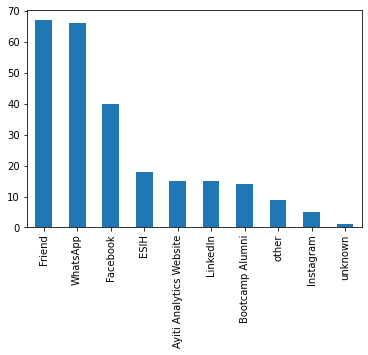

In [125]:
reslt['hear_AA_1'].value_counts().plot.bar()

In [126]:
reslt['percentage_completed'].mean()

0.33191105897058837

In [127]:
data = reslt.loc[reslt['percentage_completed'] >= 0.33191105897058837, : ]

In [128]:
data['hear_AA_1'].value_counts()

Friend                     14
WhatsApp                    9
Bootcamp Alumni             6
Facebook                    5
Ayiti Analytics Website     3
LinkedIn                    3
other                       1
ESIH                        1
Name: hear_AA_1, dtype: int64

<AxesSubplot:>

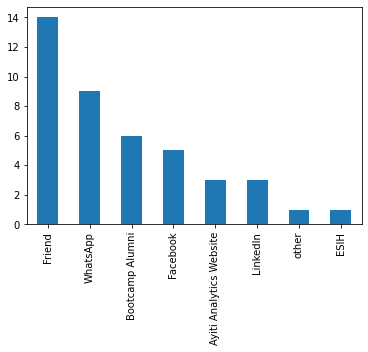

In [129]:
data['hear_AA_1'].value_counts().plot.bar()

####What will be the average number of applications per week that we could have

In [130]:
average_students = reslt.loc[(reslt['education_level'] =='Bachelors (bacc +4)' ) |  (reslt['education_level']=='Masters') | (reslt['education_level'] =='Doctorate (PhD, MD, JD)') ]
average_students.shape

(163, 36)

In [131]:
students_university_students = average_students.shape[0]/ reslt.shape[0]
students_university_students

0.652

In [230]:
particicipant = 30
average_university_students = mean_university_students * number_of_particicipant
average_university_students

19.560000000000002

#The average number of university students who are expected to participate in this program is 19.5600000000000002 equal to 20

How many weeks should we extend the application process to select 60 students per commune?

In [182]:

p=250 #here the quantity applicant of now 
w=5 #the number of the week
q=p/w #the average by applicants the week
print("Actual average applicants by week :", q)


#Total future selected
r=60 #selected students by commune
s=3 #the commune's number
t=r*s #The quantity of applicant that will be selected
print("Total future selected :", t, "applicants")


u=20 
v=(p*t)/u 
print("Total future applicants :", v, "applicants")

#found the extend delay after getting the average application by week
x=v/q #Total future week
y=x-w #Extend delay

print("the number of weeks that we should extend the application process to select 60 students per commune is ", y, "weeks")

Actual average applicants by week : 50.0
Total future selected : 180 applicants
Total future applicants : 2250.0 applicants
the number of weeks that we should extend the application process to select 60 students per commune is  40.0 weeks


#If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

In [134]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='gray',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [135]:
def prob_category(data,top_n=5,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,5)):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

In [165]:
transaction['Payment Method'] = 'Moncash'
ord['Payment Method'] = 'Credit Card/Paypal'
x = transaction.loc[:,['Payment Method','user_id']]
y = ord.loc[:,['Payment Method','user_id']]
trans_ord= pd.concat([x,y],axis=0)

enrollment=pd.merge(enroll,trans_ord, how = 'left',on = ['user_id'] )


enroll= enrollment.loc[:,['Payment Method','user_id','quest_id']]
meean_enroll=enrollment['percentage_completed'].value_counts(ascending=True).mean()
meean_enroll
meean_enroll= moy_enroll/10
en=enroll1[enroll1['percentage_completed'] > moy_enroll]
en['percentage_completed'].to_frame




<bound method Series.to_frame of 13     0.930233
16     0.697674
20     0.534884
21     0.418605
22     0.953488
24     0.452381
27     0.906977
37     0.833333
44     0.813953
45     0.619048
48     0.511628
50     0.860465
52     0.953488
57     0.452381
58     0.523810
68     0.953488
73     0.534884
75     0.906977
76     0.883721
77     0.953488
82     0.744186
85     0.953488
88     0.674419
89     0.790698
90     0.906977
91     0.395349
92     0.906977
93     0.465116
94     0.488372
99     0.813953
103    0.604651
104    0.418605
107    0.395349
108    0.604651
111    0.883721
123    0.418605
124    0.883721
129    0.697674
131    0.465116
132    0.418605
133    0.767442
139    0.604651
Name: percentage_completed, dtype: float64>

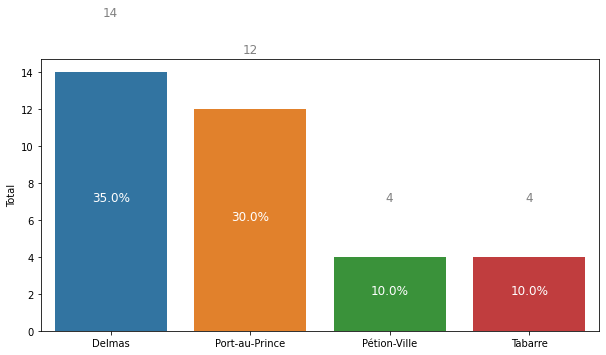

,Total,Percent
Delmas,14,0.35
Port-au-Prince,12,0.30
Pétion-Ville,4,0.10
Tabarre,4,0.10


In [166]:

new_merge=pd.merge(left=en, right=reslt, how = 'left',on='quest_id')
prob_category(data=new_merge,top_n =4 ,col="Commune_FR",abs_value ="Total",rel_value ="Percent",show_plot=True, title="",figsize=(10,5))

In [148]:
data1 = data.loc[data['gender'] == 'female', : ]

In [149]:
data1['hear_AA_1'].value_counts()

WhatsApp           3
Bootcamp Alumni    3
Friend             2
Facebook           2
LinkedIn           1
other              1
Name: hear_AA_1, dtype: int64

<AxesSubplot:>

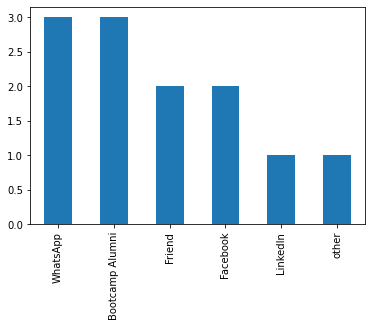

In [151]:
data1['hear_AA_1'].value_counts().plot.bar()